In [17]:
!pip install pandas
!pip install matplotlib
!pip install scipy



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums
from scipy.stats import shapiro
from scipy.stats import kstest
from scipy.stats import ttest_ind
from IPython.display import display
from IPython.display import Image

## the computing of all the data needed is down prior the presentation
in the example you'll see the programm steps in detail

In [3]:
# define file path
filename1 = '/Users/andreaswedenig/Desktop/non_parametric_statistics/InitialData/SHBärental.csv'
# define period
start_date = '1960-01-01'
end_date = '2015-01-01'
# read csv and store it in pd dataframe 
df_1 = pd.read_csv(filename1, sep='\s+', header=1, names = ('Date','Time', 'delim', 'Height'), encoding = "ISO-8859-1")
# make sure that numbers are float not object type
df_1 = df_1.rename(columns={'Height': 'data_1'})
df_1['data_1'] = pd.to_numeric(df_1['data_1'].str.replace(',', '.'))
df_1['Date'] = pd.to_datetime(df_1['Date'], format='%d.%m.%Y')
df_1.set_index('Date', inplace=True)
# filter after predefined period
df_filtered = df_1[start_date : end_date]
df_filtered = df_filtered[["data_1"]]
# resample to monthly frequency
df_monthly = df_filtered.resample('M').mean()

#select month you wnt to investigate
df_month_mean = df_monthly.loc[df_monthly.index.month == 1] # 1 = January... 12 = December
# calculate the mean of each Month
df_month_mean = df_month_mean.groupby(df_month_mean.index.year).mean()

In [4]:
#combine the data of both periods into one list to rank them in ascending order

# create boolean indexing conditions for each decade
period_1 = (df_month_mean.index >= 1960) & (df_month_mean.index <= 1979)
period_2 = (df_month_mean.index >= 1995) & (df_month_mean.index <= 2014)
# create new data frames for each decade
df_period1 = df_month_mean.loc[period_1]
df_period2 = df_month_mean.loc[period_2]

df_period1 = df_period1.reset_index()
df_period1['Date'] = df_period1.index + 1
df_period1 = df_period1.set_index('Date')
df_period2 = df_period2.reset_index()
df_period2['Date'] = df_period2.index + 1
df_period2 = df_period2.set_index('Date')
df_period1 = df_period1.rename(columns={'data_1': 'values'})
df_period2 = df_period2.rename(columns={'data_1': 'values'})

In [5]:
df_period1and2 = pd.concat([df_period1, df_period2], axis=1)
df_period1and2.columns = ['period_1', 'period_2']
# create a new dataframe with all 30 values
df_ranked = pd.DataFrame({'values': df_period1and2['period_1'].tolist() + df_period1and2['period_2'].tolist()})
# rank the values and add a new column with the ranks
df_ranked['ranks'] = df_ranked['values'].rank(method='min')
df_ranked = pd.DataFrame(df_ranked, columns=['values', 'ranks'])
df_sorted = df_ranked.sort_values('ranks', ascending=True) #sort values to show ascending order

In [6]:
#now compare the single datasets with the ranked dataset
#this lets us build the sum of the ranks
df_compared1 = pd.merge(df_period1,df_ranked , on='values', how='left')
df_compared2 = pd.merge(df_period2,df_ranked , on='values', how='left')
ranksum1 = df_compared1['ranks'].sum()
ranksum2 = df_compared2['ranks'].sum()


# non parametric hypothesis test

# <u> Andreas Wedenig & Martin Lindlmayer</u>

## what are we talking about?

# <u> Andreas</u>
## * Basic concepts: exchangeability & ranks
## * Wilcoxon rank sum test



# <u> Martin</u>
## *median absolute deviation
## *spearman’s rank correlation




##  Wilcoxon Rank-Sum Test

**The Wilcoxon rank sum test** or also called Mann-Whitney U test is a non-parametric hypothesis test used to determine whether two independent samples come from the same population or not. 
It may be considered as the nonparametric alternative of the t-test.

This test is particularly useful when the data is ***not normally distributed*** or when the **sample sizes are small***.

**In easy words:**
* Think about precipitation in a city in winter and summer
* you want to find out if there is any difference between summer and winter
* One way to do this is to compare the average of the two groups
* **But** if the data is not normally distributed or if the variances are unequal, you may not be able to use a t-test to compare the means.

This is where the **Wilcoxon rank sum test comes in.** 
* It's non-parametric = no need for assumptions about the underlying distribution of the data, so no need for a bell-shaped curve, which is described by the mean and standard derivation. 
* Instead of comparing the means of the two groups, the test compares the ranks of the observations in the two groups.

**Before** we start with the test, we have to work through some theoretical stuff. At first i will explain why to use non parametric tests instead of paramteric ones and then i'll explain the concept of exchangeability, which is crucial to understand this kind of test.

## parametric vs. non parametric test? 

**parametric:**
* tests assume samples come from a prescribed family of distributions, 
* leaving only the parameters of the distribution open to question
* For instance, a univariate Gaussian distribution is characterized by two parameters, the mean and variance, and hypotheses are expressed in terms of those parameters
* parametric test: T-Test, ... 

**non parametric:** 
* or distribution-free methods
* make fewer assumptions
* can be applied even if the data are in the form of ranks rather than numerical values
* For some hypotheses, non- parametric tests are almost as powerful as parametric tests, hence some statisticians recommend nonparametric methods as a first choice.
* non parametric test: Wilcoxon Rank Sum Test, ...



<Figure size 50x50 with 0 Axes>

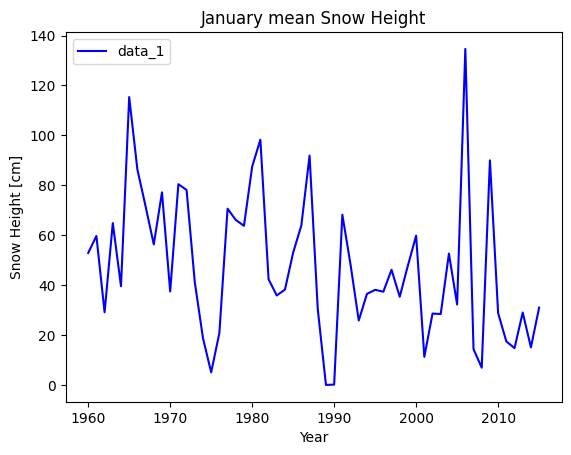

In [7]:
#show the mean monthly snowheights of the selected period
plt.figure(figsize=(0.5, 0.5)) #plot data
df_month_mean.plot(kind='line', color='blue')
plt.xlabel('Year')
plt.ylabel('Snow Height [cm]')
plt.title('January mean Snow Height')
plt.legend()
plt.show()

# The Problem

How did snow heights in January change in response to global warming? To investigate this question, a scientist collects data of daily snow heights over a period of **45 years**. The scientist knows, that there has been an **increase in Temperature** in the Area of investigation. 

The scientist **compares** two periods:
* the first 15 years (Period 1)
* the last 15 years (Period 2)

The measured change snow height might be **caused by random sampling variability** rather than a **physical change.** To investigate this possibility, the scientist decides to test the hypothesis that rising temperatures have no effect on precipitation.

* $H_0$ : The snow height **does not** change between the two periodos $\rightarrow \hat{\sigma}_X = \hat{\sigma}_Y \rightarrow$ data is **exchangeable** 
* $H_A$ : The snow height **does** change between the two periods$\rightarrow \hat{\sigma}_X \neq \hat{\sigma}_Y \rightarrow$ data is **not exchangeable** 

This hypothesis are for a two-tailed test, we ask if there is a difference between those 2 periods.
It would be also possible two perform a one-tailed test, the question would then be if the snow heights in one period are higher/lower than in the the other period.

To investigate the question stated above, a scientist performs a **Wilcoxon Rank Sum Test**. 

Thus, the scientist,
* 1.) collects data of snow heights for two periods
* 2.) throws the data together and ranks them ascending, beginning with the smallest value
* 3.) sums the ranks of both periods individually
* 4.) determines the mean and variance of the rank sum
* 5.) makes use of the Central Limit Theorem due to Erdös and Rényi
* 6.) finally calculates the standardized variable $z$ and compares it with a suitable threshold $z_{\alpha/2}$

The scientist will decied as followed:
* Reject $H_0$ if $|z| > z_{\alpha/2}$    
* Accept $H_0$ if $|z| < z_{\alpha/2}$  


# Exchangeability and Ranks

How is it event possible, to know nothing about the mean or the variance and still perform a hypothesis test? 

The approach is surprisingly simple.

**Exchangeability:** 
Suppose X and Y are continuous random variables drawn independently of the same population. 


**If** two variables **X and Y are exchangeable**, their joint distribution remains the same after swapping the variables, and **the probability of X > Y must be identical to the probability of X < Y.** 

$P(X > Y) = P(X < Y)$

This expression illustrates the use of exchangeability: the probability on the left- hand side is simply the probability on the right-hand side after variables have been swapped.

**easy example:**???

I have a pot with 10 apples, 5 green and 5 red ones, the probability to take a red one is the same as to get a green one, so P(red) = P(green)
f X = 1 and Y = 1, it means that we have one red and one green apple. If we swap the values of X and Y, we would still have one red and one green apple, so the joint distribution of X and Y remains the same.


**Now with 3 Variables, X, Y, Z.** What is the probability of X > Y > Z ? 

When X,Y,Z are exchangeable it means that  
all 6 possible combinations have the same probability:


* $P(X > Y >Z)$,
* $P(Y > X >Z)$
* $P(Z > X >Y)$,
* $P(X > Z >Y)$
* $P(Y > Z >X)$,
* $P(Z > Y >X)$


**Each of this Combinations has a probaility of $ P = \frac{1}{6}$.**

More generally, if we have $N$ continuous, exchangeable variables $X1,X2, . . . ,X_N$,then

$P(X1 > X2 > ... > X_N) = \frac{1 }{N!}$

This equality holds regardless of the population distribution.

### The basic idea is to test hypotheses using ranks rather than numerical values.

* In simple words, when we **arrange things in a certain order** based on some criteria, we call it **ranking**.
* The position of an object in that order is called its rank.
* We can use ranks instead of numbers to test our ideas.

### If we can swap the objects and still get the same order, we call them exchangeable

* When we use ranks, we don't have to worry about extreme values (outliers) as much.
* This is because a rank-based test is not affected by the actual value of an outlier. 


## Now towards the Wilcoxon Rank Sum Test

to explain it, i will swap between the snow height example and the example with the Variables X,Y,Z where P=1/6. 

* In this test, we **combine the samples** from both sets and **rank them** in order from smallest to largest. 

* If the samples were drawn from the **same distribution**, then the ranks assigned to the variables from **both sets** should be **spread uniformly over the possible ranks**, so the sums of these ranks should have the same value

* However, if one set of data is shifted to the right relative to the other set, then the ranks assigned to the variables in that set will generally be higher than the ranks assigned to the variables in the other set. 

* The rank sums of both sets are then compared to test the hypothesis objectively.

* If the rank sum for one set is **significantly larger** than the rank sum for the other set, then it suggests that the distribution of that set is shifted to the right relative to the other set. Thus, we can conclude that the two sets are not drawn from the same distribution.


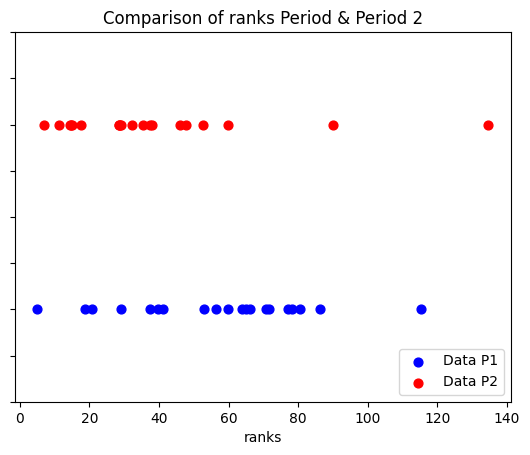

Ranksum of P1 is: 505.0
Ranksum of P2 is: 315.0


In [8]:
x1 = df_period1['values']
x2 = df_period2['values']
y1 = 0.5  # Set y values as constant
y2 = 1.5 # Set y values as constant
# Create scatter plot on x-axis only
plt.scatter(x1, [y1]*len(x1), s=40, color='blue', label='Data P1')
plt.scatter(x2, [y2]*len(x2), s=40, color='red', label='Data P2')
plt.title('Comparison of ranks Period & Period 2')
plt.xlabel('ranks')
plt.ylabel('')
plt.ylim(0, 2)
plt.gca().set_yticklabels([])
plt.legend(loc='lower right')
plt.show()
print("Ranksum of P1 is:", ranksum1)
print("Ranksum of P2 is:", ranksum2)

### Have a look on the figure to get these points:

* The figure suggests that P1 tends to be assigned higher ranks than P2
* ***If they were drawn from the same distribution, one could not see a difference here***
* The rank sums confirm that the rank sum for P1 is larger than that of P2 

## How to construct a hypothesis test? 

+ it is instructive to consider a much smaller example.

+ we go back to our example where $N_X = N_Y = 3$ so in total there are $6$ possible ranks $1,2,3,4,5,6$


* There are **20 possible sums** for the **ranks of $X_1, X_2, X_3$**, and thus, also for $Y_1, Y_2, Y_3$

* $1+2+3= 6$ 
* $1+3+5= 9$ 
* $2+3+4= 9$ 
* $2+5+6= 13$
* $1+2+4= 7$
* $1+3+6= 10$
* $2+3+5= 10$
* $3+4+5= 12$
* $1+2+5= 8$
* $1+4+5= 10$
* $2+3+6= 11$
* $3+4+6= 13$
* $1+2+6= 9$
* $1+4+6= 11$
* $2+4+5= 11$
* $3+5+6= 14$
* $1+3+4= 8$
* $1+5+6= 12$
* $2+4+6= 12$
* $4+5+6= 15$

+ In the case of general $N_X$ and $N_Y$ , the total number of possible rank sums is a standard result in combinatorics.

$ (\frac{N}{N_X})=\frac{N!}{(N-N_X)!N_X}$

**If X and Y are exchangeable,** it means that there is no reason to believe that one group of numbers (represented by X) is more likely to have a higher rank sum than the other group (represented by Y).

Therefore, **each possible rank sum for X is equally likely to occur**, and the probability of obtaining a particular rank sum is simply the number of ways that rank sum can occur divided by the total number of possible rank sums (which is 20 in this case).

## **The table & Figure shows the count statistics**

for example: we have **once** the rank sum of 6 or 15,  **3 times** a rank sum of 10 or 11

## we can already see the values are approximately normally distributed, which we can now take advantage of

   rank sum  count  probability to occur
0         6      1                  0.05
1         7      1                  0.05
2         8      2                  0.10
3         9      3                  0.15
4        10      3                  0.15
5        11      3                  0.15
6        12      3                  0.15
7        13      2                  0.10
8        14      1                  0.05
9        15      1                  0.05


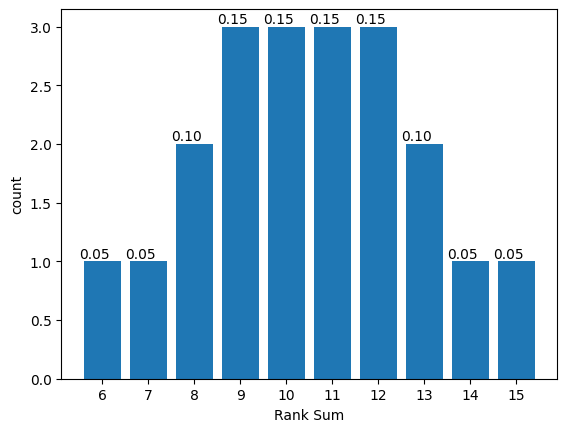

In [9]:
example_rank_sum = [6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
example_counter = 20
example_count = [1, 1, 2, 3, 3, 3, 3, 2, 1, 1]
example_prob = [c/20 for c in example_count]
example_data = {'rank sum': example_rank_sum, 'count': example_count, 'probability to occur': example_prob}
example_df = pd.DataFrame(example_data)

fig, ax = plt.subplots()
ax.bar(example_df['rank sum'], example_df['count'], width = 0.8)
ax.set_xticks(example_df['rank sum'])
ax.set_xlabel('Rank Sum')
ax.set_ylabel('count')
# add the probability to occur on top of each bar
for i, count in enumerate(example_df['count']):
    ax.text(i+5.5, count + 0.03, f'{count/20:.2f}', ha='left')
print(example_df)
plt.show()


This **works well with only 3 Variables cause they only have 20 combinations**. If we had 5 Variables we would already have 252 possible combinations and **10 varibales have 184756!!! combinations.**

This is one way to get to the test statistic, but


## How can the probabilities/ the test statistic be estimated by simpler methods? 

* standard Central limit Theorem is not possible, **cause variables are not independent** , if the rank “3” appears as one of the terms in a rank sum, then it cannot appear in any other term in the rank sum.

* **but** there is another Central Limit Theorem due to Erdös and Rényi that applies to the rank sum when the sample sizes are large.


Central Limit Theorem due to Erdös and Rény **states that the rank sum is approximately Gaussian for sufficiently large sample size** $N_X$ and $N_Y$ .

It's a recursion formula that allows a stepwise and less computationally intensive determination of the critical values.

**To apply this theorem, we need only determine the mean and variance of the rank sum. Let the rank sum of $X$ be denoted $R_X$:**

$R_X = \sum_{n=1}^{N_X} \text{rank}[X_n]$

$E[R_X] = \frac{N_X(N_X+N_Y+1)}{2}$

$\operatorname{var}[R_X] = \frac{N_X N_Y (N_X + N_Y + 1)}{12}$


**Next step is to apply a continuity correction and calculate the z value, which adjusts for the use of a continuous distribution to approximate a discrete distribution.** 
* Basically, the continuity correction shifts z by a fraction toward the center.

$
z_{cor} =\frac{R_X - E[R_X] + C}{\sqrt{\text{var}[R_X]}}$

where 

$C = -0.5$ for $R_X > E[R_X]$

$C = +0.5$ for $R_X < E[R_X]$

## ....let's see how all this works with our snow height example

## remember, our hypothesis are: 
* $H_0$ : The precipitation **does not** change between the two simulations $\rightarrow \hat{\sigma}_X = \hat{\sigma}_Y \rightarrow$ data is **exchangeable** 
* $H_A$ : The precipitation **does** change between the two simulations$\rightarrow \hat{\sigma}_X \neq \hat{\sigma}_Y \rightarrow$ data is **not exchangeable** 

We have two periods with each 20 values. 

## **2.)First thing we do is to throw them all into one pot and rank them ascending beginning with the lowest value, lowest value gets number 1.**

In [10]:
df_sorted

values  ranks
15    5.064516    1.0
33    6.935484    2.0
26   11.290323    3.0
32   14.387097    4.0
37   14.774194    5.0
39   15.064548    6.0
36   17.483871    7.0
14   18.774194    8.0
16   20.838710    9.0
28   28.451613   10.0
27   28.612903   11.0
35   28.838710   12.0
38   29.032258   13.0
2    29.129032   14.0
30   32.258065   15.0
23   35.354839   16.0
21   37.387097   17.0
10   37.451613   18.0
20   38.129032   19.0
4    39.580645   20.0
13   41.258065   21.0
22   46.161290   22.0
24   47.903226   23.0
29   52.645161   24.0
0    52.903226   25.0
8    56.322581   26.0
1    59.709677   27.0
25   59.838710   28.0
19   63.774194   29.0
3    64.870968   30.0
18   66.129032   31.0
17   70.645161   32.0
7    71.580645   33.0
9    77.193548   34.0
12   78.129032   35.0
11   80.451613   36.0
6    86.322581   37.0
34   90.000000   38.0
5   115.354839   39.0
31  134.645161   40.0

## **3.)In the next step, we again divide the values into their groups P1 and P2 and then sum up the ranks per group.**

In [11]:
df_period1

values
Date            
1      52.903226
2      59.709677
3      29.129032
4      64.870968
5      39.580645
6     115.354839
7      86.322581
8      71.580645
9      56.322581
10     77.193548
11     37.451613
12     80.451613
13     78.129032
14     41.258065
15     18.774194
16      5.064516
17     20.838710
18     70.645161
19     66.129032
20     63.774194

In [12]:
print("Ranked P1")
display(df_compared1)
print("Ranksum of P1 is:", ranksum1)
print("-----------------")
print("Ranked P2")
display(df_compared2)
print("Ranksum of P2 is:", ranksum2)

Ranked P1


values  ranks
0    52.903226   25.0
1    59.709677   27.0
2    29.129032   14.0
3    64.870968   30.0
4    39.580645   20.0
5   115.354839   39.0
6    86.322581   37.0
7    71.580645   33.0
8    56.322581   26.0
9    77.193548   34.0
10   37.451613   18.0
11   80.451613   36.0
12   78.129032   35.0
13   41.258065   21.0
14   18.774194    8.0
15    5.064516    1.0
16   20.838710    9.0
17   70.645161   32.0
18   66.129032   31.0
19   63.774194   29.0

Ranksum of P1 is: 505.0
-----------------
Ranked P2


values  ranks
0    38.129032   19.0
1    37.387097   17.0
2    46.161290   22.0
3    35.354839   16.0
4    47.903226   23.0
5    59.838710   28.0
6    11.290323    3.0
7    28.612903   11.0
8    28.451613   10.0
9    52.645161   24.0
10   32.258065   15.0
11  134.645161   40.0
12   14.387097    4.0
13    6.935484    2.0
14   90.000000   38.0
15   28.838710   12.0
16   17.483871    7.0
17   14.774194    5.0
18   29.032258   13.0
19   15.064548    6.0

Ranksum of P2 is: 315.0


## $Rx = \sum_{i=1}^N [X_n]$

**Results are shown in the Table above.**

**The earlier, colder P1 has a rank sum of 505**

**The later, warmer P2 has a rank sum of 315**

## **4.) applies the Central Limit Theorem due to Erdös and Rény by calculating mean and variance of the Rank sum and putting it in the formula for $Z_{cor}$**


**In this example, $N_X = N_Y = 20$, implying:**

### $E [R_X] = \frac{N_X(N_X + N_Y + 1)}{2} = \frac{20(20 + 20 + 1)}{2} = 410$


### $var [R_X] = \frac{N_X * N_Y (N_X + N_Y + 1)}{12} = \frac{20 * 20 (20 + 20 + 1)}{12} = 1366.67$



 
**as $R_X > E[R_X]$ we use $-0.5$ as continuity correction**
### $Z_{cor} =\frac{R_X-E[R_X]+C}{\sqrt{var[R_X]}}=\frac{410 - 1366.67 - 0.5}{\sqrt{1366.67}} = 2.56$

The threshold value for 5% significance is $z_{0.05/2} = 1.96$

## **Since |zcor| = 2.56 > 1.96, the hypothesis that the samples were drawn from the same distribution is rejected.**

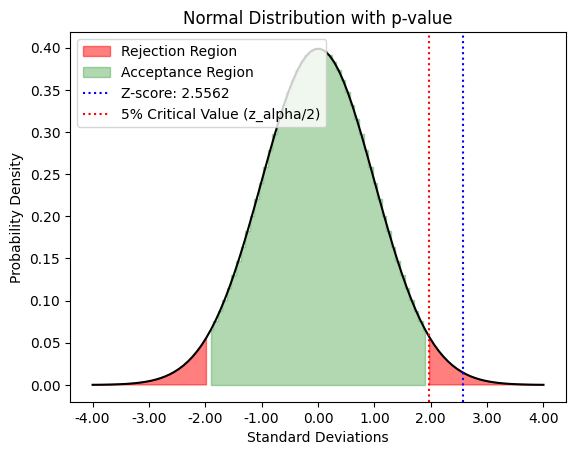

In [14]:
# Generate data for the normal distribution
mu = 0  # mean
sigma = 1  # standard deviation
x = np.linspace(mu - 4 * sigma, mu + 4 * sigma, 100)
y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((x - mu) / sigma) ** 2)

# Set up the plot
fig, ax = plt.subplots()

# Plot the normal distribution curve
ax.plot(x, y, color='black')

# Shade the region where |z| > 1.96 in red
rejection_area = ax.fill_between(x, y, where=(np.abs(x) >= 1.96), color='red', alpha=0.5)

# Shade the area between the two red regions in green
acceptance_area = ax.fill_between(x, y, where=((np.abs(x) <= 1.96) & (np.abs(x) >= 0)), color='green', alpha=0.3, step="mid")

# Add labels and title
ax.set_xlabel('Standard Deviations')
ax.set_ylabel('Probability Density')
ax.set_title('Normal Distribution with p-value')

# Add legends for the shaded areas and the p-value line
legend_handles = [rejection_area, acceptance_area, ax.axvline(x=statistic, color='blue', linestyle='dotted'), ax.axvline(x=1.96, color='red', linestyle='dotted')]
legend_labels = ['Rejection Region', 'Acceptance Region', f'Z-score: {Z:.4f}', '5% Critical Value (z_alpha/2)']

# Add legends
ax.legend(legend_handles, legend_labels, loc='upper left')

# Set x-axis ticks and tick labels
tick_values = np.linspace(min(x), max(x), 9)  # Adjust the number of ticks as needed
ax.set_xticks(tick_values)
ax.set_xticklabels(['{:.2f}'.format(value) for value in tick_values])

# Display the plot
plt.show()


### As the hypothesis is rejected, we can say that there is a difference between the snow heights of period 1 and period 2.

## Performance of the test compared to t-test

remember that there are 2 types of errors when deciding between $H_0$ and $H_A$: The null hypothesis can be rejected when it is true (Type- I error), or it can be accepted when it is false (Type-II error). 

The ***power of a test*** is defined as the probability of (correctly) rejecting the null hypothesis when it is false, which is 1 − β.

For a given type-1 error rate and given difference in distribution, the ***sample size required*** for a test to ***obtain a certain type-2 error*** can be determined. The ***ratio of the sample sizes*** for the two tests is then called the ***relative efficiency***. 

The relative efficiency depends on sample size and the details of how two distributions differ, but in some cases it converges to a constant in the limit of large sample size. This constant is called the asymptotic **relative efficiency (A.R.E.)**.

* For ***normal distributions***, the A.R.E. of the Wilcoxon rank-sum test compared to the t-test is 0.955 
* This number ***means that*** the Wilcoxon rank- sum test requires about 5% more samples to achieve the same level of performance than the t-test. However, when the distribution is non-Gaussian, the A.R.E. can be higher (even infinity).
* Also, if two distributions differ only by a location parameter, the A.R.E. is always greater than 0.864 (Hodges and Lehmann, 1956).      
* Because the ***Wilcoxon rank-sum test is only slightly less inefficient*** than the t-test under a Gaussian distribution, its greater simplicity and broader applicability lead many statisticians to recommend the Wilcoxon rank-sum test as the primary test of the hypothesis that the means of two populations are equal.

## Recap


1. **Rank-based hypothesis tests have several advantages:**
   - They are non-parametric tests that do not rely on specific assumptions about the underlying distribution of the data, making them more robust to violations of assumptions.
   - They can be applied to data that are not normally distributed or have outliers.
   - They are suitable for ordinal or non-numeric data, as they only require the ordering of observations.
   - They provide a way to analyze data without making strong distributional assumptions.

2. **Some disadvantages of rank-based hypothesis tests include:**
   - They may have lower power compared to parametric tests when the assumptions of parametric tests are met.
   - They do not provide direct interpretation of effect sizes or estimate population parameters.
   - They may lose some information by converting the data into ranks and ignoring the actual values.

3. The rank correlation, such as Spearman's correlation, is **preferred over the Pearson correlation when** the relationship between variables is not necessarily linear or when the data may contain outliers. Rank correlation measures the monotonic relationship between variables, which is more general and robust to deviations from linearity or normality.

4. **In general:** The Wilcoxon Rank-Sum test, also known as the Mann-Whitney U test, is a non-parametric test used to compare the distributions of two independent samples. It assesses whether the medians of the two samples are significantly different. The test ranks all observations from both samples, sums the ranks of one sample, and compares it to the expected sum under the null hypothesis of no difference.

5. If the Wilcoxon Rank-Sum test indicates a statistically significant difference between two samples, we expect that there is a difference in the central tendency or location of the two distributions. Specifically, the medians of the two samples are likely to be different.

6. The **relative efficiency** of a test compares the statistical power of one test to another. It quantifies how much more efficient one test is in detecting a specific alternative hypothesis compared to another test. In the context of comparing the Wilcoxon Rank-Sum test to the t-test, the relative efficiency depends on the underlying distribution and the specific alternative hypothesis.

7. The Wilcoxon Rank-Sum test might be **recommended instead of the t-test** for several reasons:
   - When the assumptions of the t-test are violated, such as non-normality or the presence of outliers.
   - When the data are measured on an ordinal scale or are non-numeric.
   - When there is concern about the robustness of the results to deviations from normality.
   - When the research question focuses on comparing the distributions or central tendencies rather than the means.
   - When sample sizes are small, and the t-test assumptions may not hold or result in less reliable inference.

In [13]:
# Extract the values from the two dataframes
x = df_period1['values']
y = df_period2['values']

# Perform the Wilcoxon rank sum test
statistic, p_value = ranksums(x, y)

# Calculate expected value
n1 = len(x)
n2 = len(y)

mean_rank = (n1 * (n1 + n2 + 1)) / 2
var_rank = (n1 * n2 * (n1 + n2 + 1)) / 12

# calculate Z-score
Z = (ranksum1 - mean_rank -0.5) / np.sqrt(var_rank)


# Print the test statistic and p-value
print("ranksum P1:", ranksum1)
print("length of x:", n1)
print("length of y:", n2)
print("Test statistic:", statistic)
print("p-value:", p_value)
print(f"Expected rank sum: {mean_rank:.4f}")
print(f"Variance of rank sum: {var_rank:.4f}")
print(f"Z-score: {Z:.4f}")

ranksum P1: 505.0
length of x: 20
length of y: 20
Test statistic: 2.569758458802182
p-value: 0.010176944502960148
Expected rank sum: 410.0000
Variance of rank sum: 1366.6667
Z-score: 2.5562
